# AlphaCare Insurance Solutions (ACIS) - Car Insurance Risk and Predictive Analytics
---

## Project Overview
As a marketing analytics engineer at AlphaCare Insurance Solutions (ACIS), this project aims to analyze historical insurance claim data to optimize marketing strategies and identify low-risk targets for premium reduction. The analysis will cover insurance terminologies, A/B hypothesis testing, machine learning, and statistical modeling to provide actionable insights and recommendations for tailoring insurance products effectively.

## Key Objectives
- Understand insurance terminologies and perform A/B hypothesis testing.
- Fit linear regression models and develop machine learning models to predict total claims and optimal premium values.
- Conduct exploratory data analysis (EDA) to summarize data, assess data quality, and identify trends and outliers.
- Visualize key insights through creative and informative plots.

In [1]:
# Import necessary libraries and modules
import os
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path to import local modules
sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.insurance_analysis import InsuranceAnalysis

# Adjust settings for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('../data/MachineLearningRating_v3/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)
# intalize the class
analysis = InsuranceAnalysis(data)
df = analysis.load_data()

In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Calculate descriptive statistics for numerical features.

In [4]:
analysis.descriptive_statistics()

,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,1.048175e+05,6.329371e+04,1.000000e+00,5.514300e+04,9.408300e+04,1.391900e+05,3.011750e+05
PolicyID,1000098.0,7.956682e+03,5.290039e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000098.0,3.020601e+03,2.649854e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07


## Data Quality Assessment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
# Check for missing values in the dataset.
analysis.check_missing_values()

,Missing Values,% of Total Values,Data type
NumberOfVehiclesInFleet,1000098,100.00,float64
CrossBorder,999400,99.93,object
CustomValueEstimate,779642,77.96,float64
Rebuilt,641901,64.18,object
Converted,641901,64.18,object
WrittenOff,641901,64.18,object
NewVehicle,153295,15.33,object
Bank,145961,14.59,object
AccountType,40232,4.02,object
Gender,9536,0.95,object


### Key Insights: 📊
- The dataset contains vehicle insurance information with over 1 million records across 52 columns. 📝
- It includes a mix of policy, customer, vehicle, and coverage details. 📋
- Most fields have high completeness, with many being 100% populated. ✅
- The dataset contains both categorical (e.g., vehicle type, coverage) and numeric fields (e.g., premiums, claims). 🔢
- Vehicle details include make, model, year, and specifications. 🚗
- Financial fields include premiums, sum insured, and claims. 💰
- Geographic data is available at the country and province levels, with Cresta zones. 🌎
- Customer data includes demographics and banking details. 👥
- The `NumberOfVehiclesInFleet` column has no non-null values, indicating it might be irrelevant or need further investigation.
- The `CrossBorder` column has 99.93% missing values, suggesting it may not be useful for analysis.
- Columns like `CustomValueEstimate`, `Rebuilt`, `Converted`, and `WrittenOff` have significant missing values (over 60%), which may require imputation or exclusion.
- Columns such as `NewVehicle`, `Bank`, `AccountType`, `Gender`, and `MaritalStatus` have relatively low missing values (less than 16%), which can be handled with imputation.
- Critical columns like `UnderwrittenCoverID`, `PolicyID`, `TransactionMonth`, `IsVATRegistered`, `Citizenship`, `LegalType`, `Title`, `Language`, `Country`, `Province`, `PostalCode`, `MainCrestaZone`, `SubCrestaZone`, `ItemType`, `RegistrationYear`, `AlarmImmobiliser`, `TrackingDevice`, `SumInsured`, `TermFrequency`, `CalculatedPremiumPerTerm`, `ExcessSelected`, `CoverCategory`, `CoverType`, `CoverGroup`, `Section`, `Product`, `StatutoryClass`, `StatutoryRiskType`, `TotalPremium`, and `TotalClaims` have no missing values, ensuring the integrity of key data points.

In [6]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [7]:
df = analysis.drop_high_missing_columns()

Dropped 6 columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


In [9]:
df = analysis.date_conversion()

e:\10 Academy Project\KAIM_W3_CarInsurance_Marketing_Insights\scripts\insurance_analysis.py:64: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['VehicleIntroDate'] = pd.to_datetime(self.df['VehicleIntroDate'], errors='coerce').dt.to_period('M')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

## Plot histograms for numerical columns and bar charts for categorical columns.

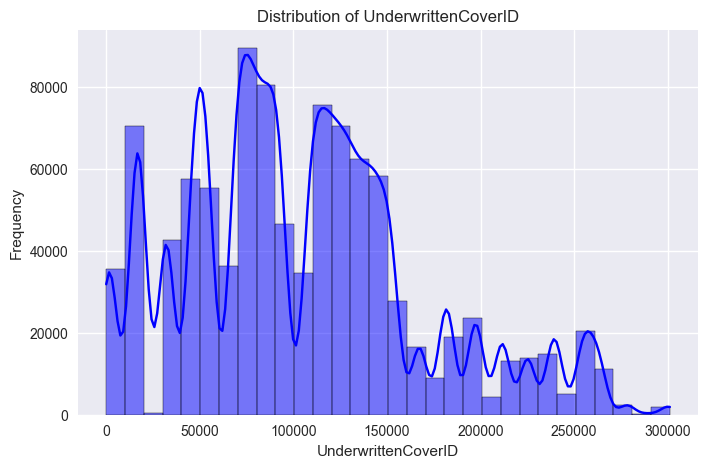

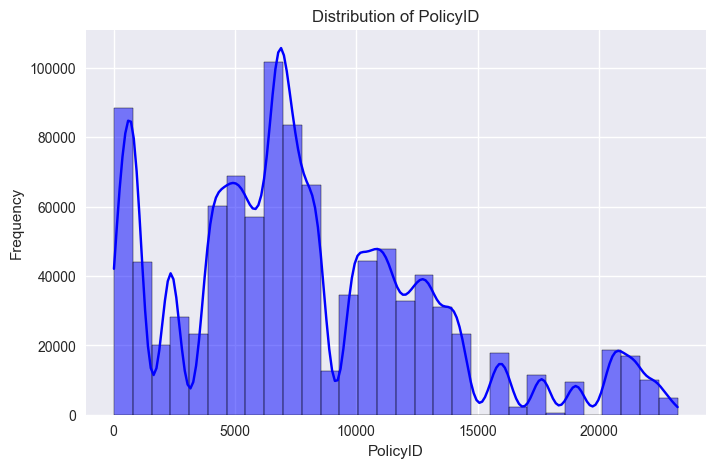

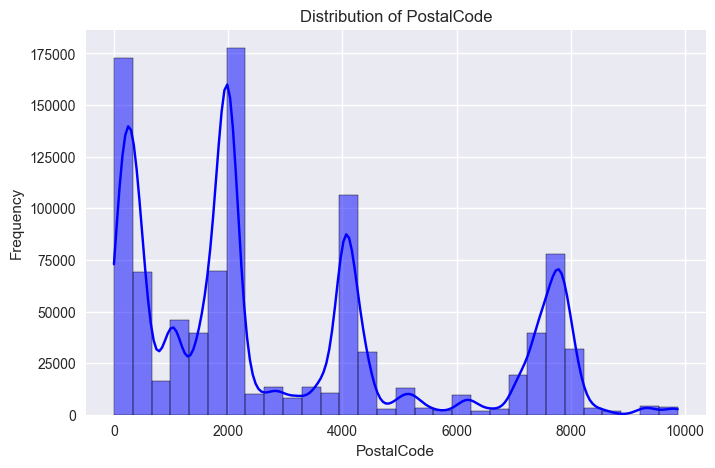

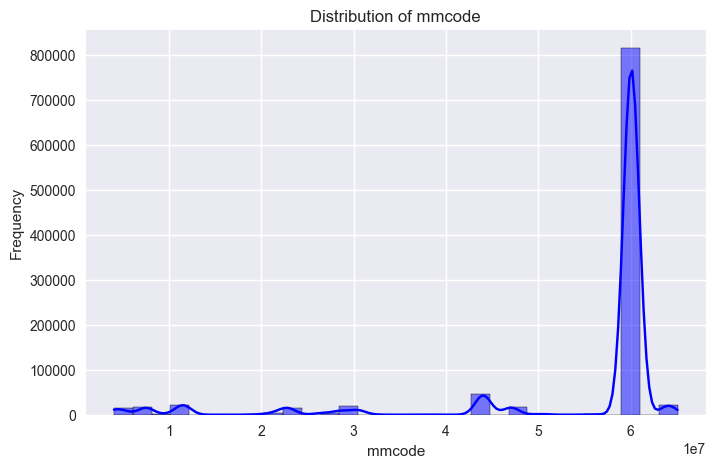

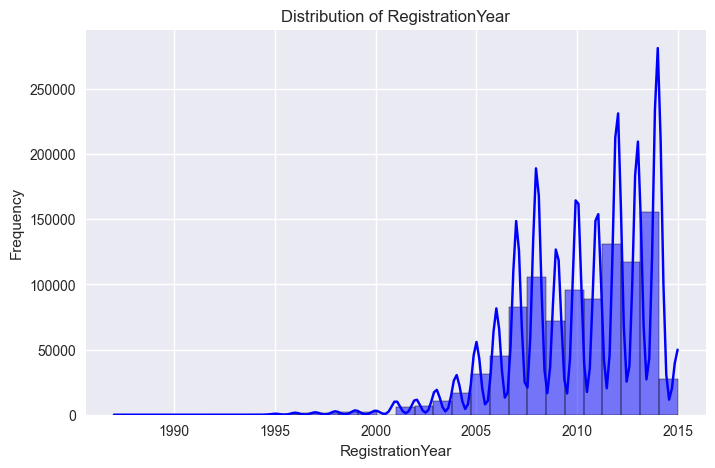

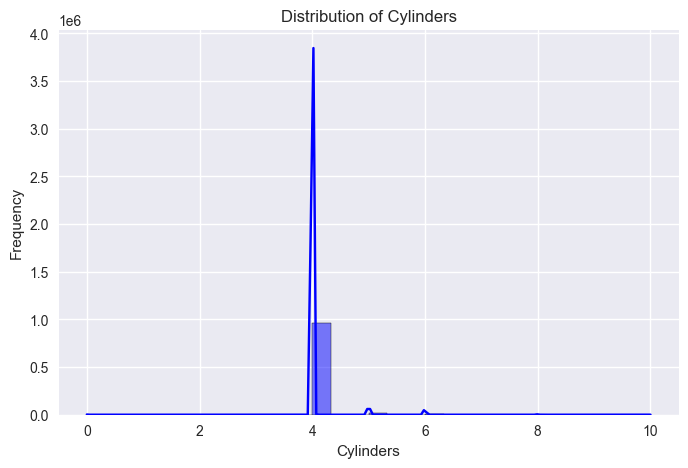

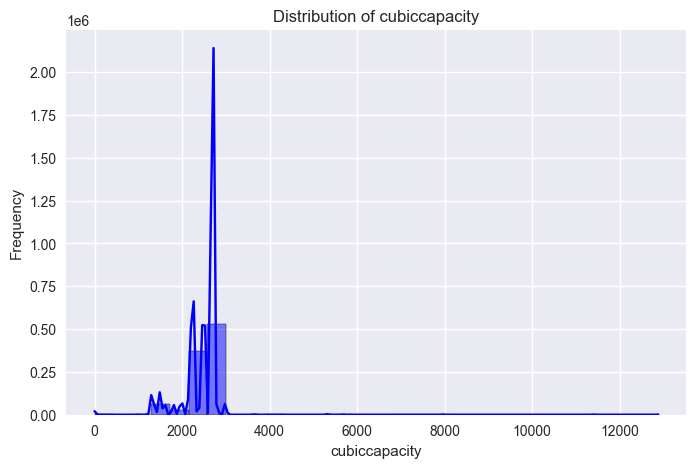

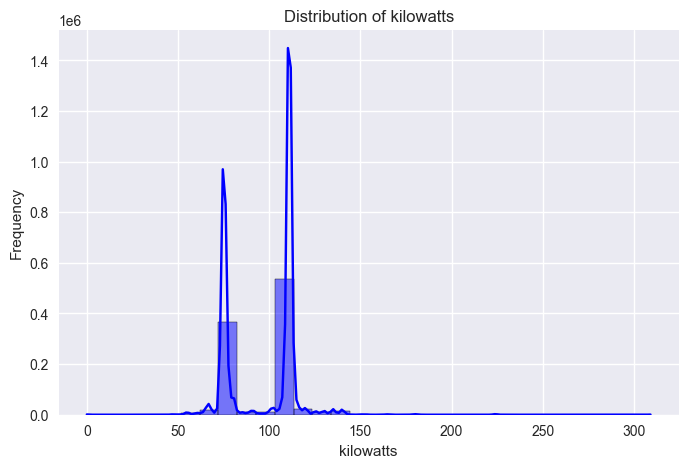

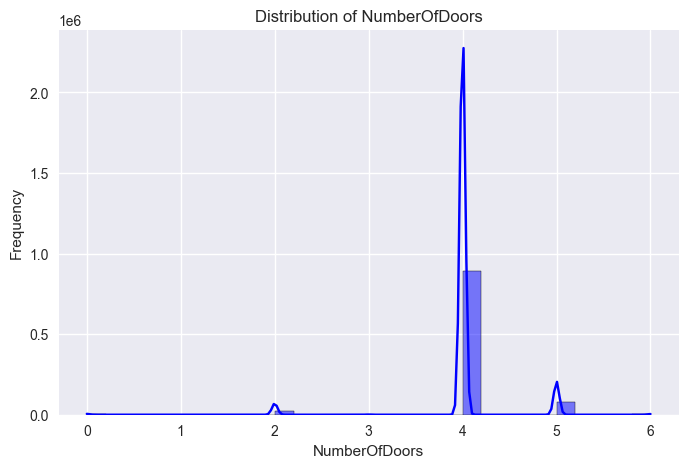

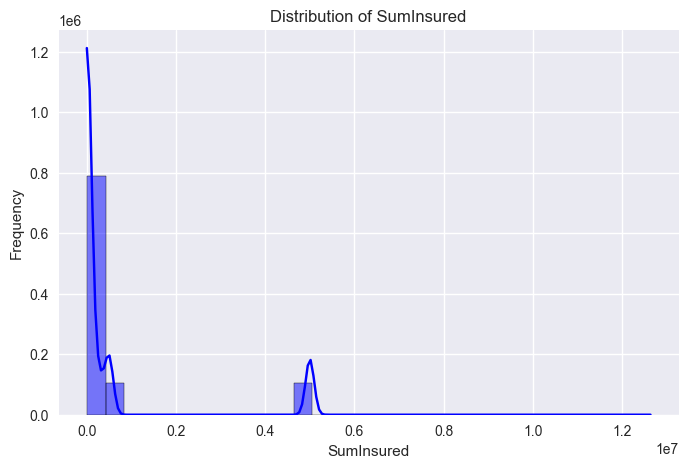

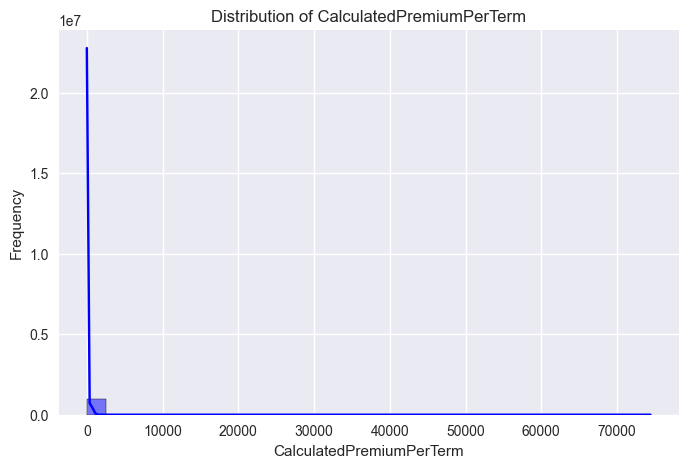

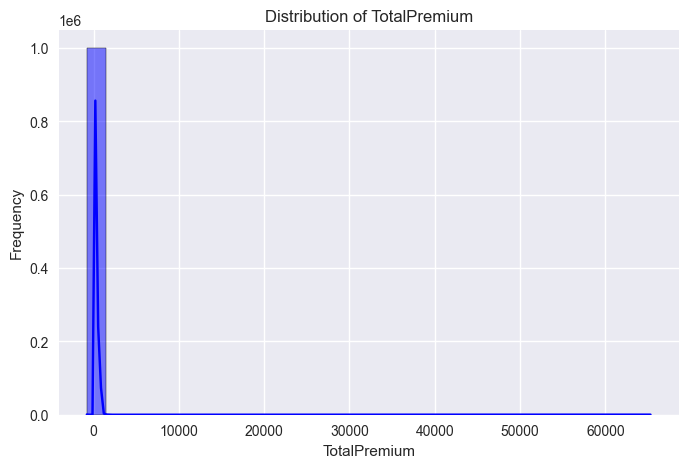

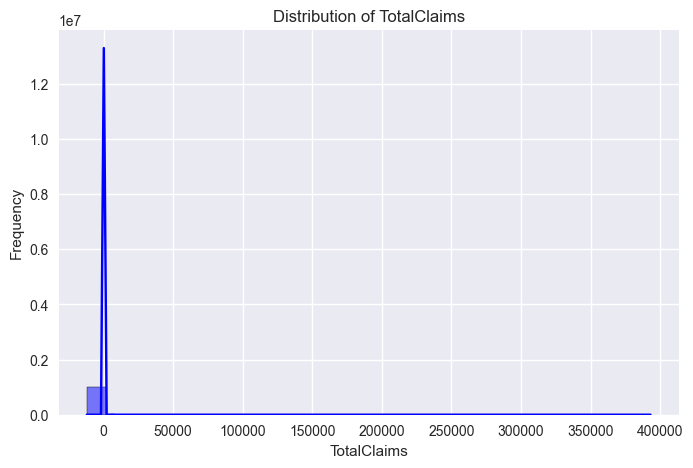

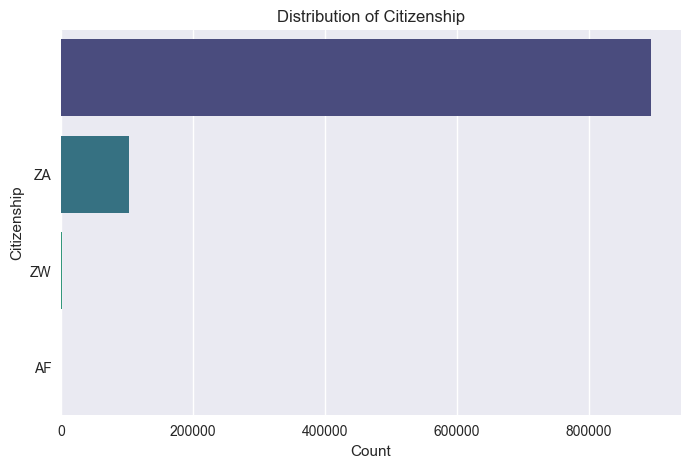

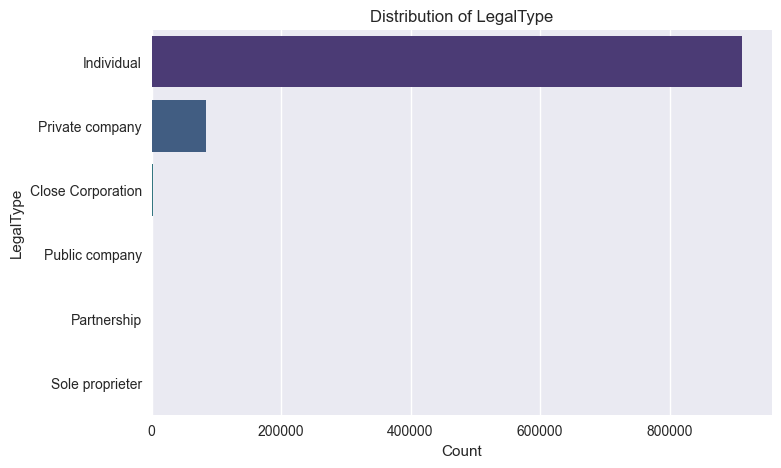

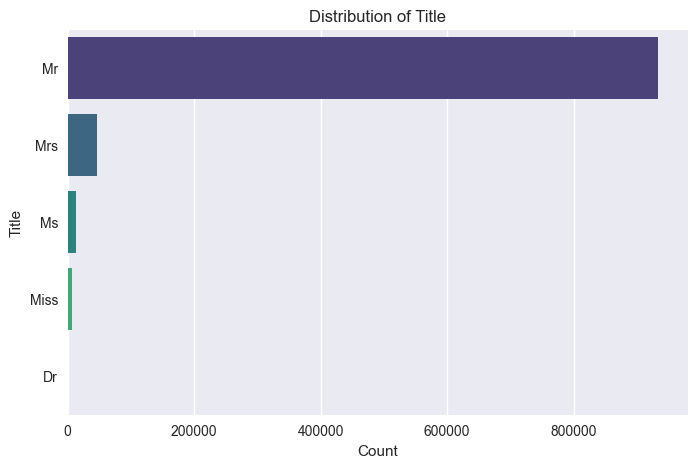

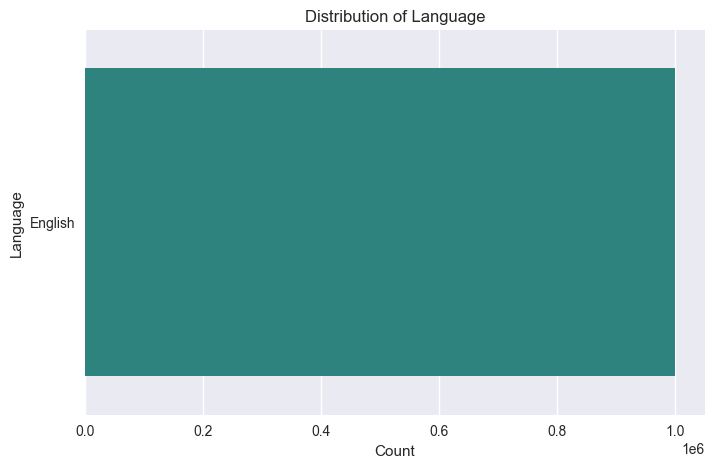

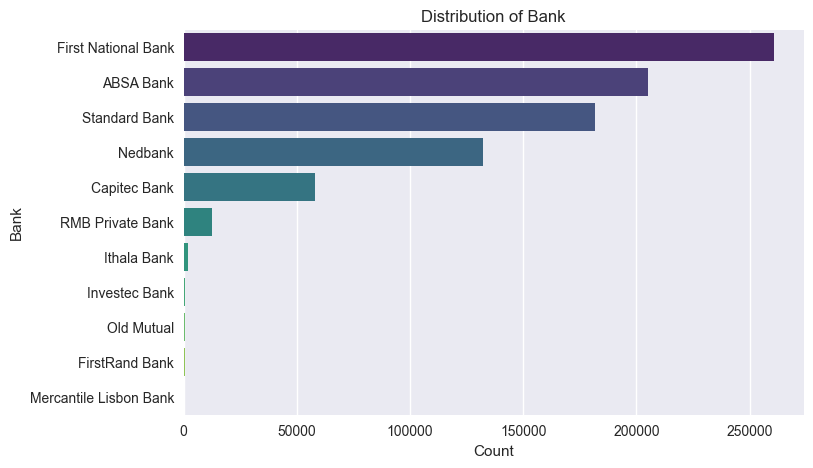

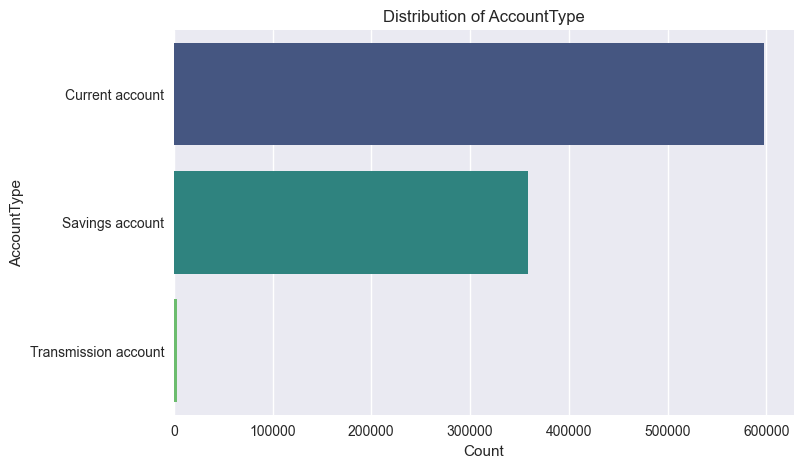

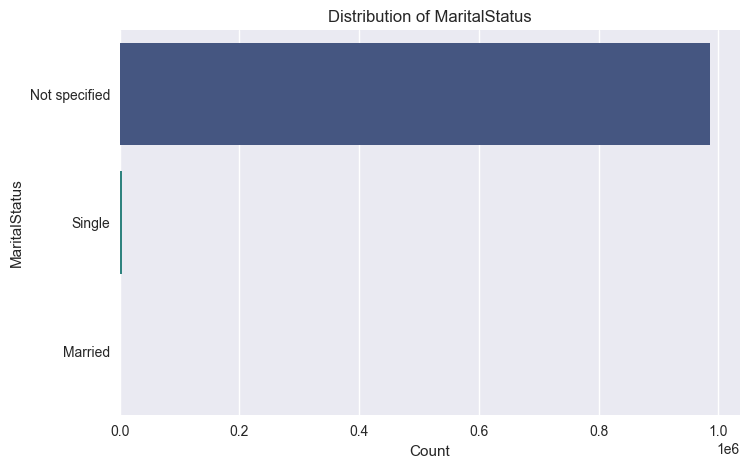

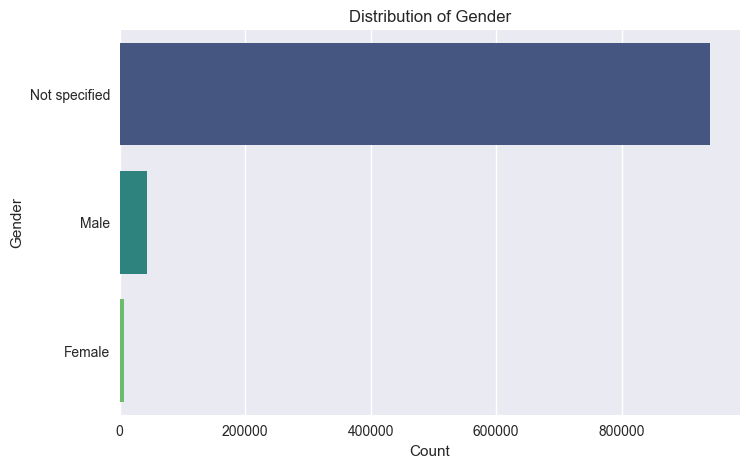

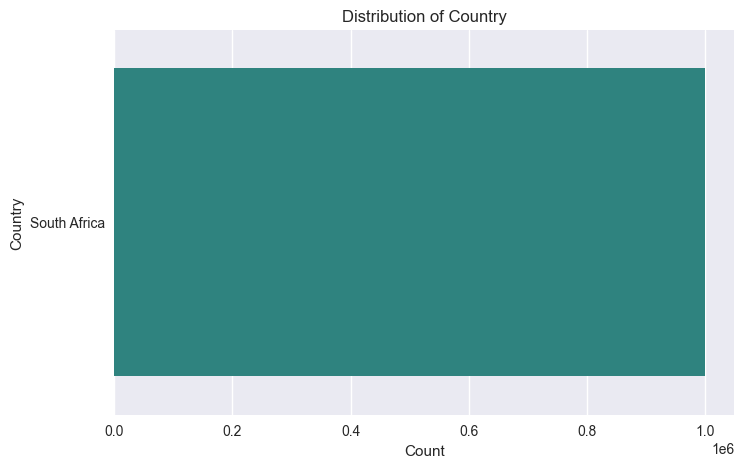

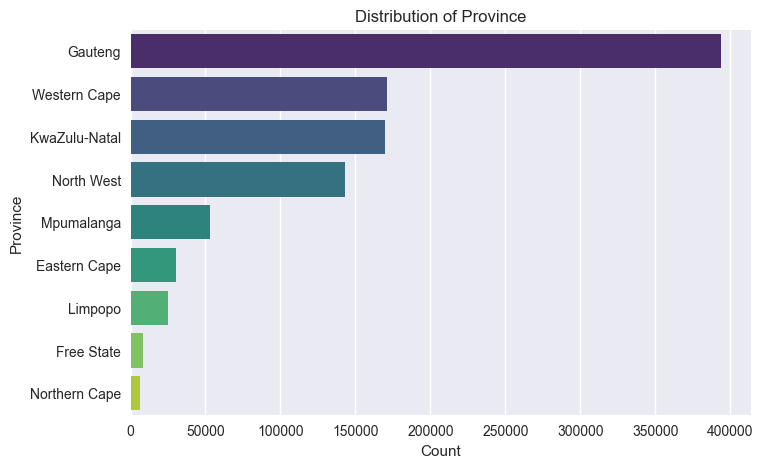

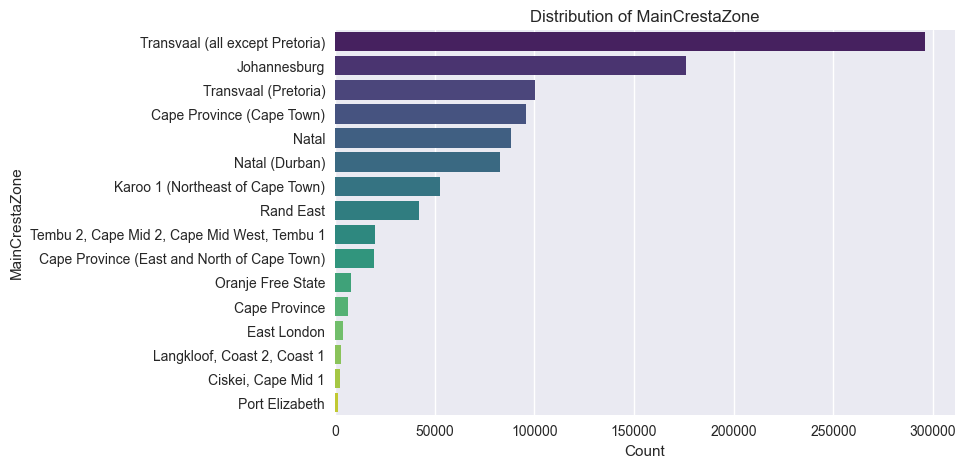

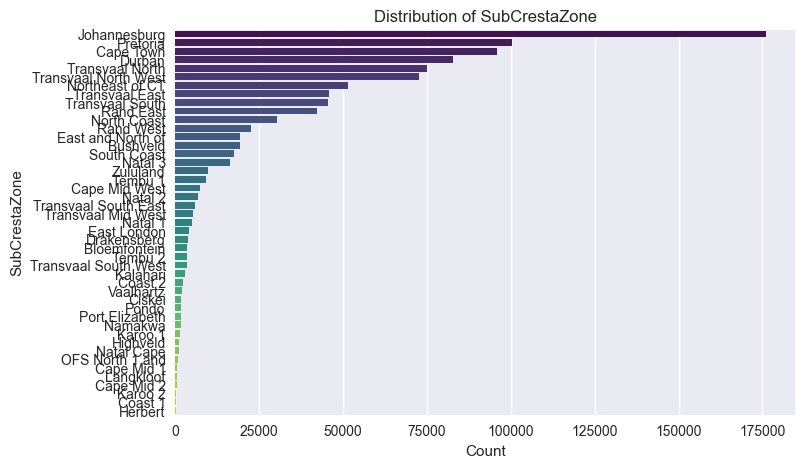

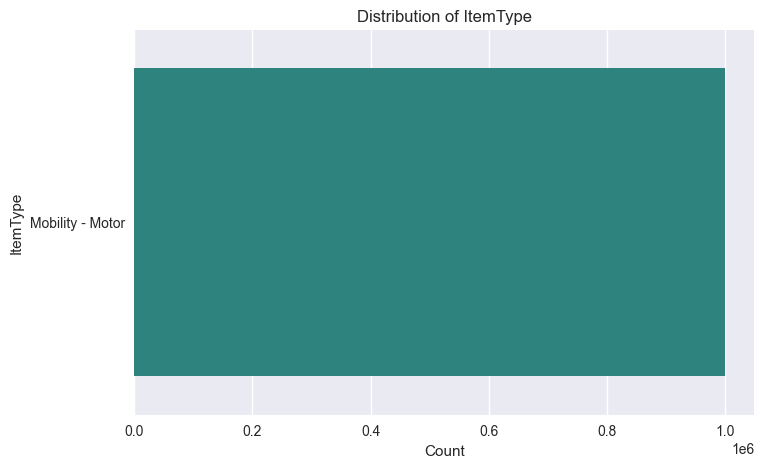

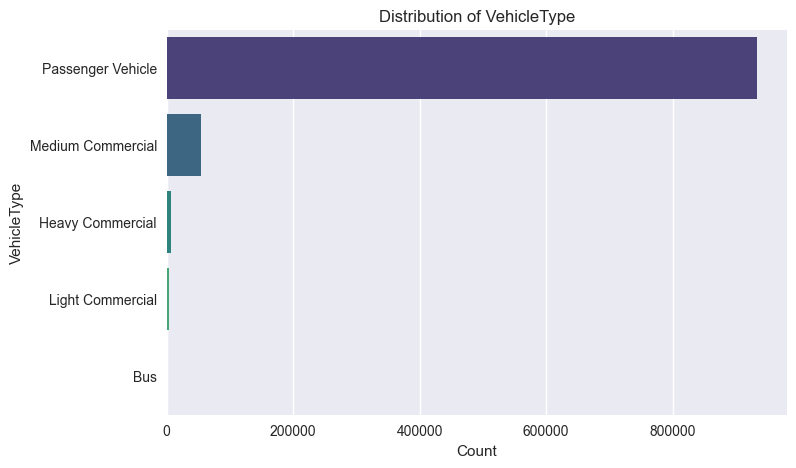

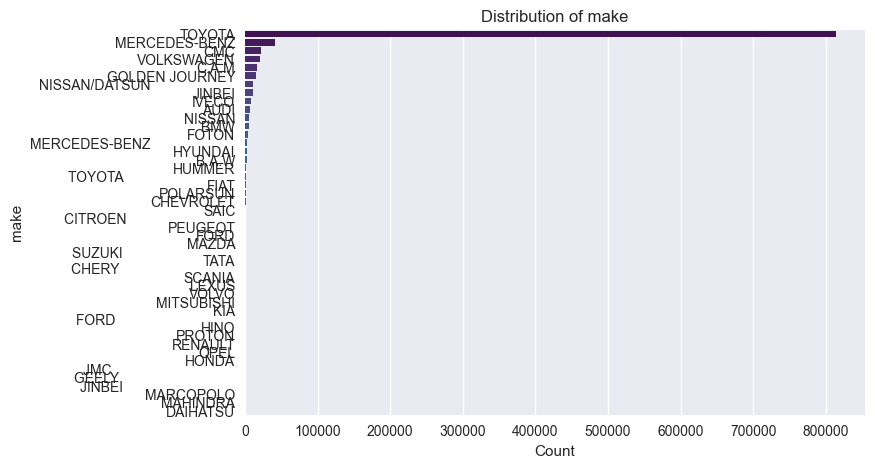

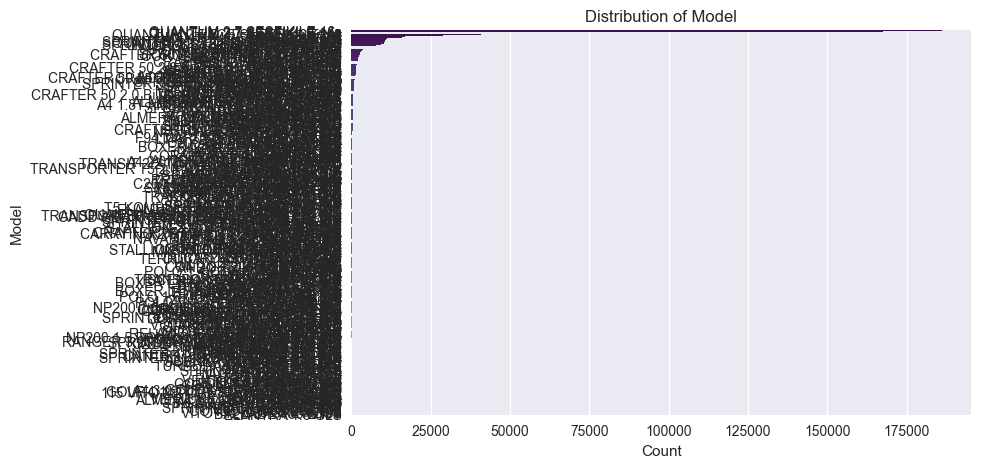

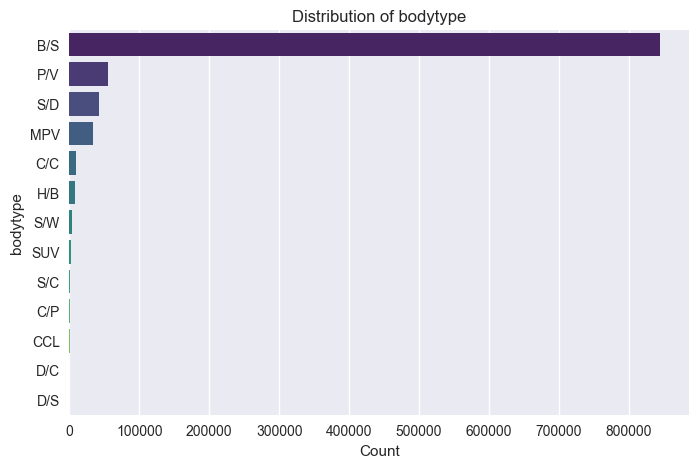

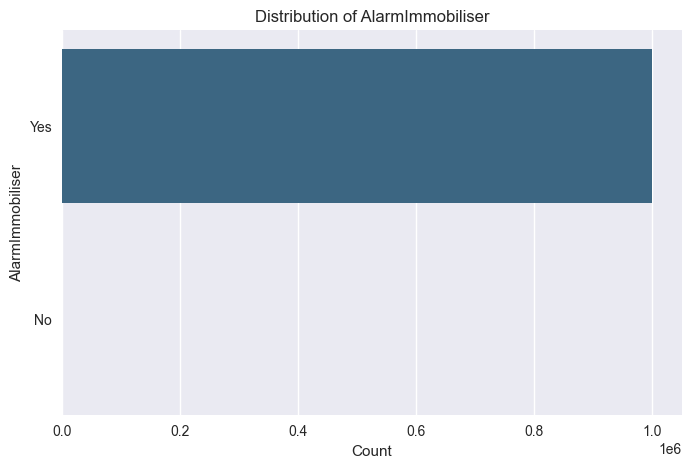

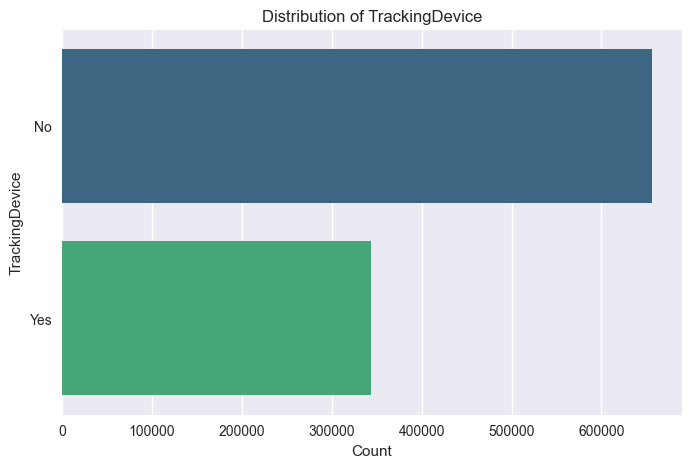

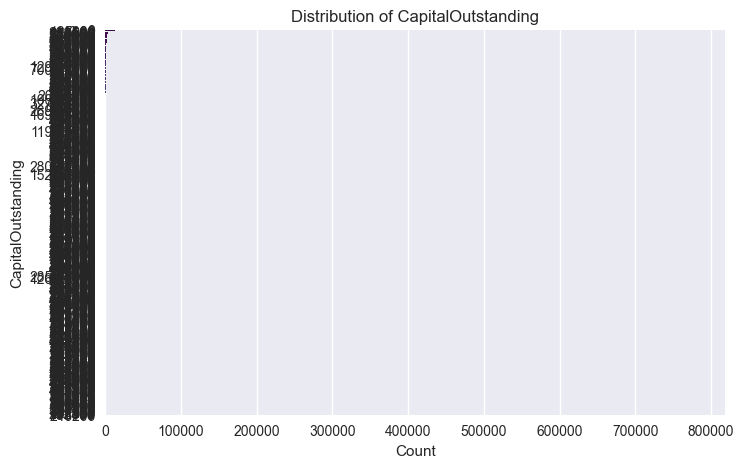

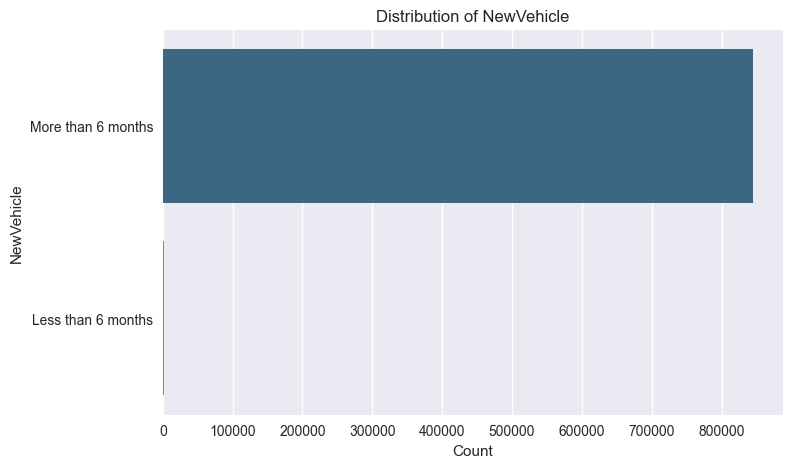

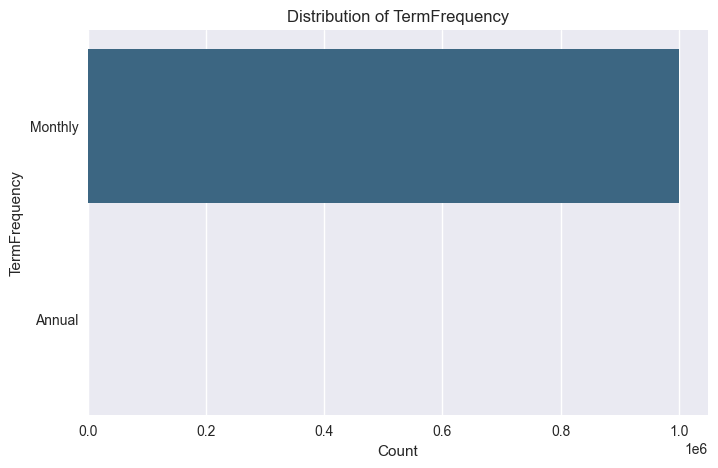

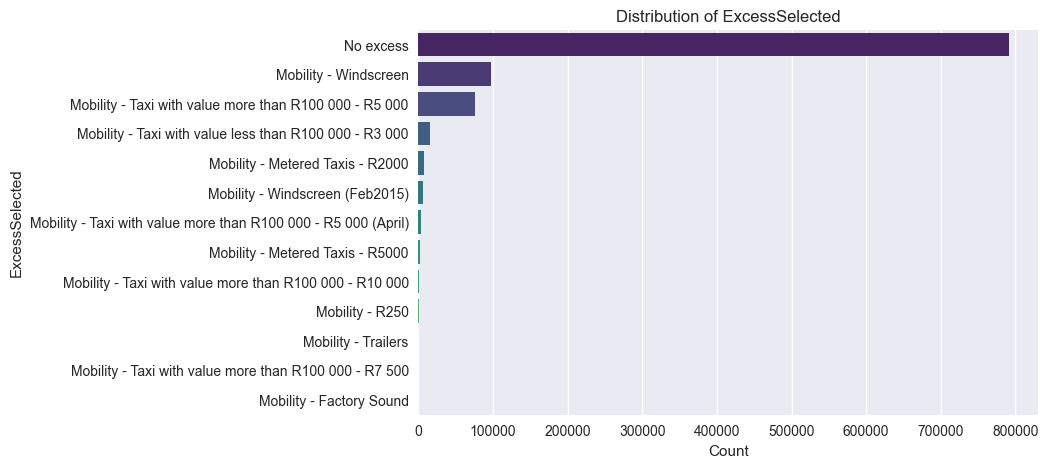

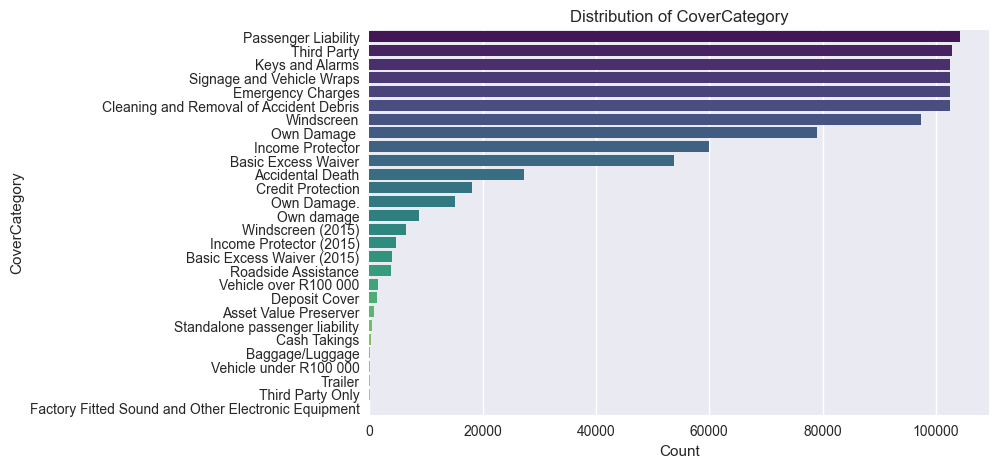

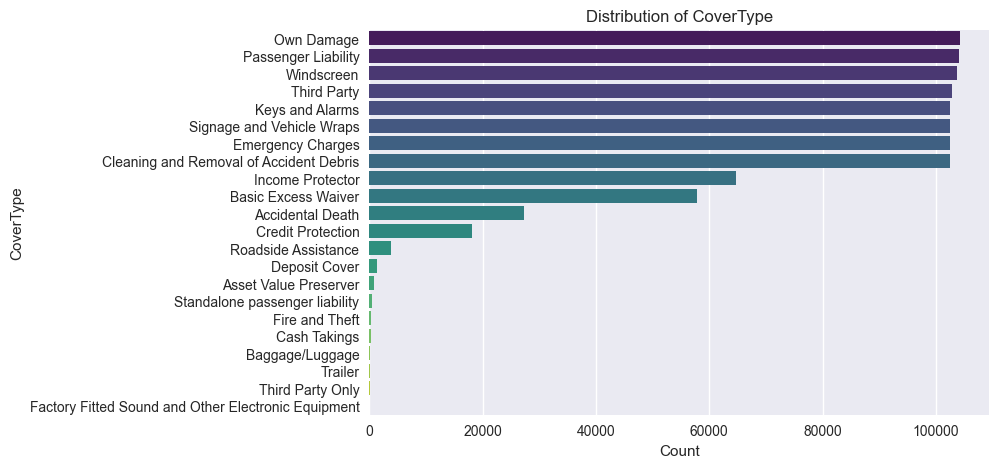

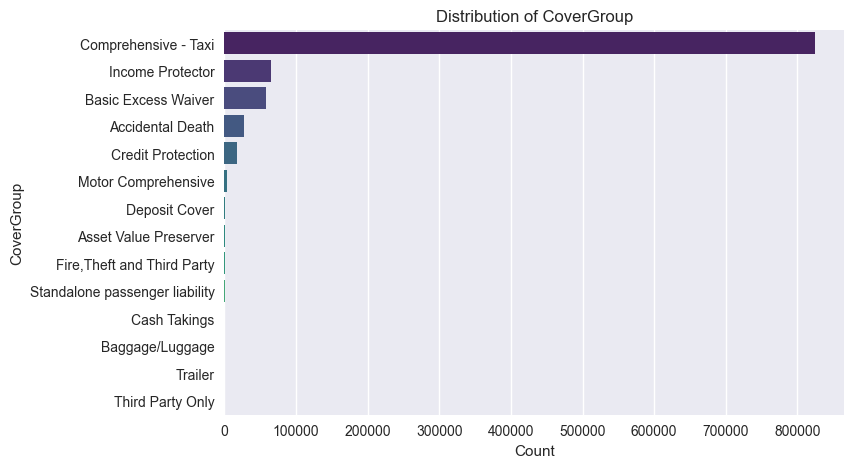

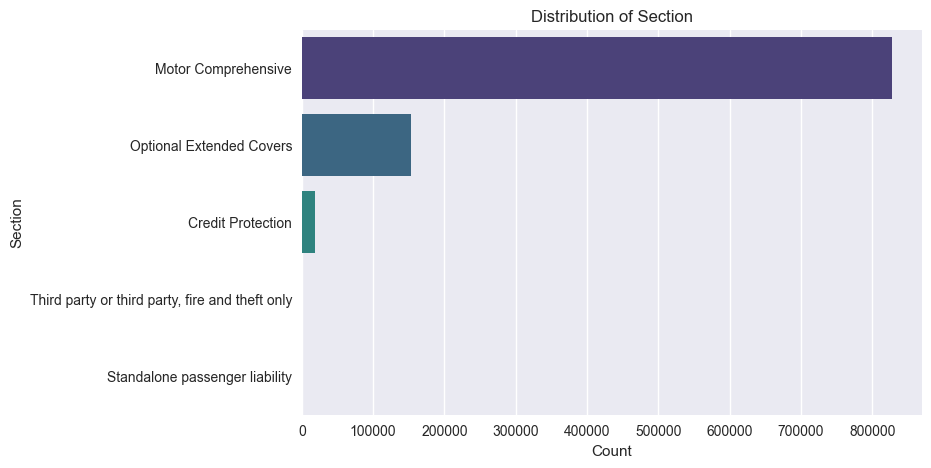

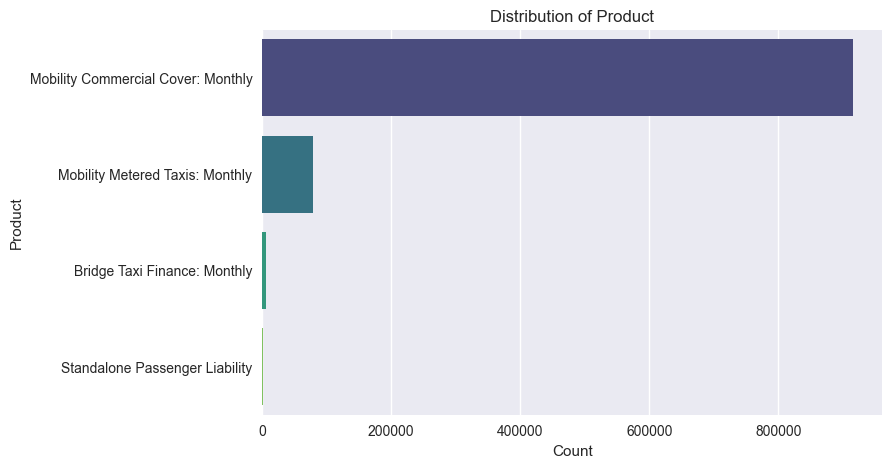

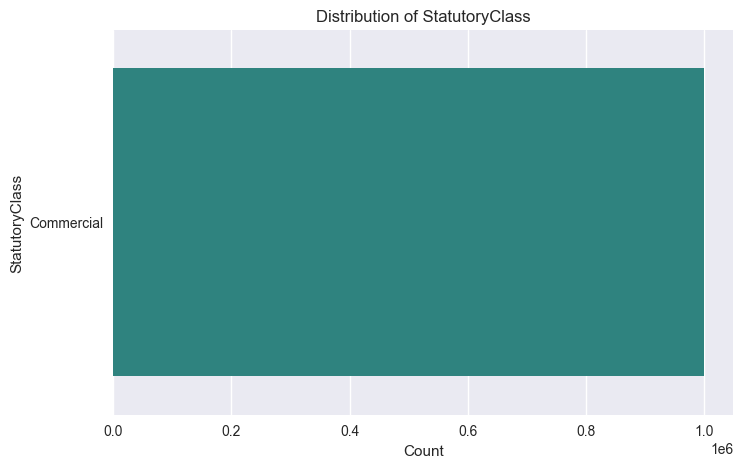

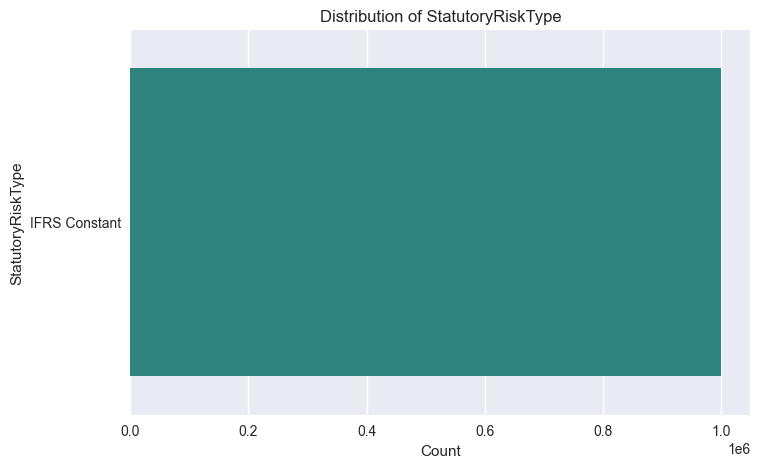

In [11]:
analysis.univariate_analysis()